# unused code

##

## API full set of data with:
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score
- PLAYERS

In [2]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="500",
                            
                            #retrive tables
                            tables = "ScoreboardGames=SG, ScoreboardPlayers=SP,Tournaments=T, Leagues=L",
                            
                            #retrive fields as columns
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SP.Link,\
                                    SG.DateTime_UTC, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score", 
                            
                            #set condition (only include specified leagues)
                            where = 'L.League_Short = "'+league+'"',
                            
                            #similar to vlookup in the web pages
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League, SP.MatchId=SG.MatchId")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break
        

  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt



## Import df_Scoreboard

In [ ]:
import pandas as pd
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])
df_Scoreboard = df_Scoreboard.drop("DateTime UTC__precision", axis=1)
df_Scoreboard.sort_values("DateTime UTC")
df_Scoreboard.head()
#df_Scoreboard.to_csv("Scoreboard.csv")

## API LCK set of data with PLAYERS team, ID, age, nationality, birthday

In [ ]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
#leagues=['LCS','LEC','LCK','LPL','CBLOL','LJL','LLA','PCS','VCS']
leagues=['LCK']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            #retrive tables
                            tables = "Teams=T, Players=P",
                            
                            #retrive fields as columns
                            fields="P.Team=Team, P.ID=ID, P.Nationality, P.Country,P.Birthdate,\
                                    T.Region=Region, T.Short", 
                            
                            #set condition 
                            #where = 'T.Name = P.Team',
                            
                            #similar to vlookup in the web pages
                            join_on = "T.Name = P.Team")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break

        
        
import pandas as pd
df_Players = pd.DataFrame([ a['title'] for a in results ])

#drop birthdate precision
df_Players = df_Players.drop("Birthdate__precision", axis=1)

df_Players.head()
#df_Players.to_csv("Players.csv")

In [ ]:
df_stats = df_Scoreboard.merge(df_Players, left_on = 'Team1', right_on = 'Team', how = 'left')
df_stats.head()
df_stats.to_csv("Merged.csv")

In [ ]:
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################

# Used Code

## 

## API full set of data with: (much faster)
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score

In [46]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
    
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League")
    
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/21 [00:00<?, ?it/s]

# Convert to Panda DataFrame and Clean Data

In [56]:
#import pandas package
import pandas as pd

#convert to dataframe from dictionary
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])

#drop unused column
df_Scoreboard = df_Scoreboard.drop("Date__precision", axis=1)

#sort by date
df_Scoreboard.sort_values(by = "Date",inplace=True)

#split date and time
df_Scoreboard["Date"] = pd.to_datetime(df_Scoreboard["Date"])
df_Scoreboard["Year"]= df_Scoreboard["Date"].dt.year

#convert Team 1 & 2 score as integers
df_Scoreboard = df_Scoreboard.astype({'Team1Score':'int','Team2Score':'int'})

#no index
df_Scoreboard = df_Scoreboard.reset_index(drop=True)

#preview first few rows
df_Scoreboard.head()

#save as csv
df_Scoreboard.to_csv("Scoreboard.csv", index=False)

## Shortcut - Import df_Scoreboard

In [1]:
import pandas as pd
df_Scoreboard = pd.read_csv("Scoreboard.csv",index_col=0)

## Get Worlds 2011 - 2022 Winners
## API full set of data with: (much faster)
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score
- Tab: Quarterfinals, Semifinals, Finals

In [49]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['WCS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
 
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L, MatchSchedule=M",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam, M.Tab", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League, M.OverviewPage=T.OverviewPage")
        
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/1 [00:00<?, ?it/s]

## Convert to Panda DataFrame and Clean Data

In [60]:
#import pandas package
import pandas as pd

#convert to dataframe from dictionary
df_Scoreboard_Worlds = pd.DataFrame([ a['title'] for a in results ])

#drop unused column
df_Scoreboard_Worlds = df_Scoreboard_Worlds.drop("Date__precision", axis=1)

#sort by date
df_Scoreboard_Worlds.sort_values(by = "Date",inplace=True)

#split date and time
df_Scoreboard_Worlds["Date"] = pd.to_datetime(df_Scoreboard_Worlds["Date"])
df_Scoreboard_Worlds["Year"]= df_Scoreboard_Worlds["Date"].dt.year

#convert Team 1 & 2 score as integers
df_Scoreboard_Worlds = df_Scoreboard_Worlds.astype({'Team1Score':'int','Team2Score':'int'})

#no index
df_Scoreboard_Worlds = df_Scoreboard_Worlds.reset_index(drop=True)

#preview first few rows
df_Scoreboard_Worlds.head()

#save as csv
df_Scoreboard_Worlds.to_csv("Scoreboard_Worlds.csv", index=False)

## Get Worlds Tournament only - dataset above contains regional finals

In [65]:
#I want to get the winners of all the Worlds Championships only
#I can't filter from 'WCS' league because it randomly includes regional finals
#But the tournaments that begin with "Worlds" can be identified
df_Scoreboard_Worlds2 = df_Scoreboard_Worlds[df_Scoreboard_Worlds["Tournament"].str.startswith("Worlds")]
df_Scoreboard_Worlds2 = df_Scoreboard_Worlds2.reset_index(drop=True)
df_Scoreboard_Worlds2.head()
df_Scoreboard_Worlds2.to_csv("Scoreboard_Worlds2.csv", index=False)

## Shortcut - Import df_Scoreboard_Worlds, df_Scoreboard_Worlds2

In [242]:
import pandas as pd
df_Scoreboard_Worlds = pd.read_csv("Scoreboard_Worlds.csv", index_col=0)
df_Scoreboard_Worlds2 = pd.read_csv("Scoreboard_Worlds2.csv", index_col=0)

## Get Winners of Finals in Worlds 

In [66]:
#define function to get winner of each match
def get_Winner(year):
    df_Scoreboard_Worlds2[df_Scoreboard_Worlds2["Year"]==year]
    return

## Graph - Top 10 Team Winners in ALL matches of Worlds

<AxesSubplot: title={'center': 'Top 10 Teams'}, xlabel='Teams', ylabel='Matches won'>

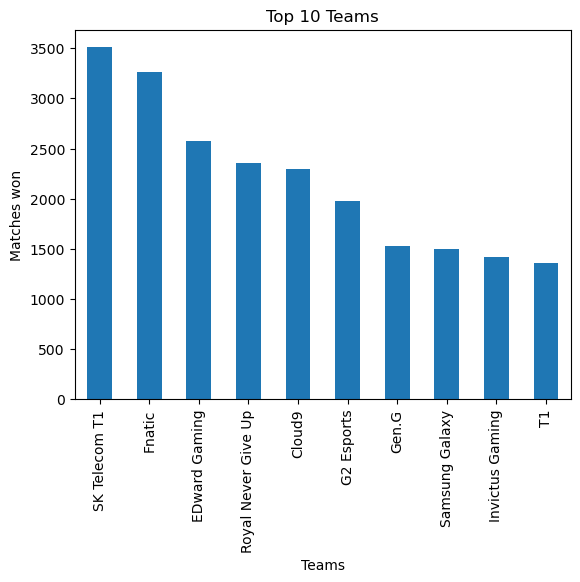

In [67]:
#who won the most matches in Worlds Championship
#most_wins = df_Scoreboard_Worlds2["WinTeam"].value_counts()

import seaborn as sns

top_10_teams = (df_Scoreboard_Worlds2['WinTeam'].value_counts()).iloc[:10]

#create bar chart of top 10 teams
top_10_teams.plot(kind='bar',title='Top 10 Teams', xlabel = "Teams", ylabel = "Matches won")

## Get list of all World Winners - filter who won most matches in Finals

In [68]:
#create function to get winner of each season/worlds 
def get_winner(year):
    finals = df_Scoreboard_Worlds2[df_Scoreboard_Worlds2["Tab"]=="Finals"]
    finals_year = finals[finals["Year"]==year]
    winner = finals_year["WinTeam"].value_counts( ).idxmax()
    return winner

get_winner(2020)

#create dictionary for Worlds Winners
years = [i for i in range(2011,2023)]

winners = []
for i in range(2011,2023):
    winners.append(get_winner(i))

dict_worlds_winners = {}
for i in range(len(years)):
    dict_worlds_winners[years[i]] = winners[i]


## Convert to Panda DataFrame and Clean Data

In [69]:
#create dataframe from dictionary
df_worlds_winners = pd.DataFrame(data = [dict_worlds_winners])
df_worlds_winners = df_worlds_winners.transpose()
df_worlds_winners.reset_index(inplace=True)
df_worlds_winners.columns = ["Year","Winner"]
df_worlds_winners.to_csv("Worlds_Winners.csv",index=False) 

## Shortcut - Import df_worlds_winners

In [10]:
import pandas as pd
df_worlds_winners = pd.read_csv("Worlds_Winners.csv",index_col=0) 

## Get All Teams Region data
## API full set of data with: (much faster)
- TEAM: Name, Region, Abbreviation 

In [480]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:

        response = site.api("cargoquery",
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "Teams=T",
                            
                            fields="T.Name=Team, T.Region=Region, T.Short=Team_abbr")
                            
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/21 [00:00<?, ?it/s]

# Convert to Panda DataFrame and Clean Data

In [481]:
import pandas as pd
df_TeamRegion = pd.DataFrame([ a['title'] for a in results ])

#clean data - remove NaN's and duplicates
df_TeamRegion = df_TeamRegion.dropna()
df_TeamRegion = df_TeamRegion.drop_duplicates(subset="Team")


#no index
df_TeamRegion = df_TeamRegion.reset_index(drop=True)

#preview first few rows
df_TeamRegion.head()

#save as csv
df_TeamRegion.to_csv("TeamRegion.csv", index=False)

## Shortcut - Import df_TeamRegion

In [485]:
import pandas as pd
df_TeamRegion = pd.read_csv("TeamRegion.csv",index_col=0)

In [6]:
df_TeamRegion.head()

,Region,Team_abbr
Team,,
00 Nation,Europe,00N
00 Prospects,Europe,00P
1 Trick Ponies,North America,1TP
1. Berliner Esport-Club e.V.,Europe,BESC
100 Thieves,North America,100


In [74]:
df_worlds_winners2 = df_worlds_winners.merge(df_TeamRegion, left_on = "Winner", right_on = "Team", how = "left")
df_worlds_winners2 = df_worlds_winners2.drop(columns="Team")
df_worlds_winners2.head()
df_worlds_winners2.to_csv("Worlds_Winners2.csv",index=False)

,Year,Winner,Region,Team_abbr
0,2011,Fnatic,EMEA,FNC
1,2012,Azubu Frost,Korea,AZF
2,2013,SK Telecom T1,Korea,SKT
3,2014,Samsung White,Korea,SSW
4,2015,SK Telecom T1,Korea,SKT


## Shortcut - Import df_worlds_winners2

In [240]:
df_worlds_winners2 = pd.read_csv("Worlds_Winners2.csv",index_col=0)

## Add DAMWON Gaming and DWG KIA to df_Team_Region

In [482]:
#DAMWON Gaming and DWG KIA both renamed - They are the same team...
#create new rows for DAMWON Gaming and DWG KIA
df_TeamRegion2 = {"Team":"DAMWON Gaming",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

df_TeamRegion3 = {"Team":"DWG KIA",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

#add new rows to df
df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)
df_TeamRegion.head()

#re-save as csv
df_TeamRegion.to_csv("TeamRegion.csv", index=False)

C:\Users\vivia\AppData\Local\Temp\ipykernel_10512\1473232610.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
C:\Users\vivia\AppData\Local\Temp\ipykernel_10512\1473232610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)


In [84]:
#repeat after adding the missing teams
df_worlds_winners2 = df_worlds_winners.merge(df_TeamRegion, left_on = "Winner", right_on = "Team", how = "left")
#df_worlds_winners2 = df_worlds_winners2.drop(columns="Team")
df_worlds_winners2.head()
df_worlds_winners2.to_csv("Worlds_Winners2.csv",index=False)

## Graph - Frequency of Worlds Winner : Teams 

([<matplotlib.axis.YTick at 0x1e8f72b2760>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

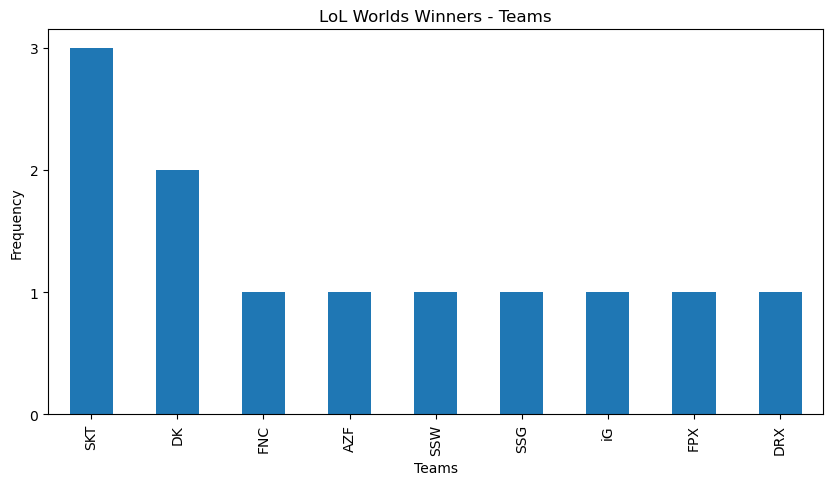

In [85]:
#Plot frequencies of team winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners2["Team_abbr"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Teams")
ax.set_xlabel("Teams")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 4, 1))

## Graph - Frequency of Worlds Winner : Regions 

([<matplotlib.axis.YTick at 0x1e8f7315cd0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

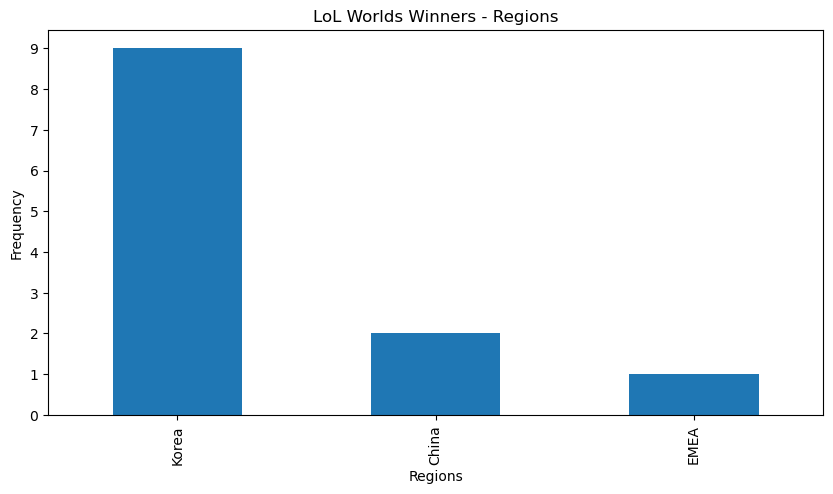

In [86]:
#Plot frequencies of region winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners2["Region"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Regions")
ax.set_xlabel("Regions")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 10, 1))

## Get Participation of Regions
- to show that Korea participated later but won a lot more matches/worlds finals


In [19]:
#get unique regions
#df_TeamRegion["Region"].unique()

#there are 20 regions to be matched
#len(df_TeamRegion["Region"].unique())

#dictionary to match regions - from googling
dict_regions_code = {
    'Africa':'EMEA',
    'Brazil':'BR',
    'China':'CN',
    'CIS':'INT',
    'EMEA':'EMEA',
    'Europe':'EMEA',
    'International':'INT',
    'Japan':'JP',
    'Korea':'KR',
    'LAN':'INT',
    'LAS':'INT',
    'Latin America':'LAT',
    'LMS':'INT',
    'MENA':'INT',
    'North America':'NA',
    'Oceania':'PCS',
    'PCS':'PCS',
    'SEA':'PCS',
    'Turkey':'EMEA',
    'Vietnam':'VN'
}

#define function to get region code from dictionary
def get_region_code(region):
    return dict_regions_code[region]

In [27]:
#create a dictionary to match teams to regions

#SOURCE - https://www.skytowner.com/explore/converting_two_columns_into_a_dictionary_in_pandas_dataframe
dict_regions = dict(zip(df_TeamRegion["Team"], df_TeamRegion["Region"]))

#define function to get region code from dictionary
def get_region(team):
    return dict_regions[team]

## Add Region to Scoreboard - so I can show participation of regions

In [87]:
df_team1 = df_Scoreboard_Worlds2.merge(df_TeamRegion, left_on = 'Team1', right_on = 'Team', how = 'left')
df_team1.head()

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Tab,Year,Region,Team_abbr
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Finals,2011,Europe,aAa
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Round 3,2011,Europe,aAa
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Round 3,2011,Europe,aAa
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Round 2,2011,Europe,aAa


In [90]:
df_team1and2 = df_team1.merge(df_TeamRegion, left_on = 'Team2', right_on = 'Team', how = 'left')
df_team1and2.head()
#cannot find some teams because they changed name

## Matching old to new team names 
- only the ones that cannot be found in df above
- some old team names may still not be matched to new ones unfortunately

In [484]:
#import manually stored file for matching old to new team names
df_OldtoNewTeams = pd.read_csv("OldtoNewTeams.csv")

#concatenate the two dataframes to add the new list of teams
df_TeamRegion = pd.concat([df_TeamRegion,df_OldtoNewTeams])
df_TeamRegion.to_csv("TeamRegion.csv",index=False)

In [117]:
#redo previous merge now that the teams can be found
df_team1 = df_Scoreboard_Worlds2.merge(df_TeamRegion, left_on = 'Team1', right_on = 'Team', how = 'left')
df_team1and2 = df_team1.merge(df_TeamRegion, left_on = 'Team2', right_on = 'Team', how = 'left')

#clean dataframe
df_team1and2.rename(columns={'Tab':'Stage','Region_x':'Region_T1','Team_abbr_x':'Team_T1','Region_y':'Region_T2','Team_abbr_y':'Team_T2'},inplace=True)

df_team1and2.head()

#df_team1and2.to_csv("Merged_1_2.csv",index=False)

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Stage,Year,Region_T1,Team_T1,Region_T2,Team_T2
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK


In [24]:
#add column for region code to Worlds Scoreboard
from tqdm.notebook import tqdm
for index,row in tqdm(df_team1and2.iterrows()):
    df_team1and2["Region_T1_abbr"] = df_team1and2["Region_T1"].apply(get_region_code)

#.iterrows() takes too long for so many rows using a dict and function
#I decided to save a csv with the Region codes and merge instead - it should take less time

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [237]:
df_Region_code = pd.read_csv("Region_Code.csv",na_filter = False) #interprets NA as string instead of NaN value

df_team1_code = df_team1and2.merge(df_Region_code, left_on = 'Region_T1', right_on = 'Region', how = 'left')
df_team1_code.drop(columns="Region",inplace=True)
df_team1_code.head()

df_team1and2_code = df_team1_code.merge(df_Region_code, left_on = 'Region_T2', right_on = 'Region', how = 'left')
df_team1and2_code.drop(columns="Region",inplace=True)

#clean dataframe
df_team1and2_code.rename(columns={"Region_code_x":"Region_code_T1","Region_code_y":"Region_code_T2"},inplace=True)

df_team1and2_code.head()

#df_team1and2_code.to_csv("Merged_1_2_code.csv",index=False)

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Stage,Year,Region_T1,Team_T1,Region_T2,Team_T2,Region_code_T1,Region_code_T2
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA


## Shortcut - Import df_team1and2

In [49]:
import pandas as pd
df_team1and2 = pd.read_csv("Merged_1_2.csv")

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Stage,Year,Region_T1,Team_T1,Region_T2,Team_T2
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK


## Group by years and find out region participation

In [338]:
#concatenate teams 1 and 2 for full partcipation
data1 = df_team1and2_code.groupby(["Year","Region_code_T1"])["Region_code_T1"].count()
data2 = df_team1and2_code.groupby(["Year","Region_code_T2"])["Region_code_T2"].count()
data = pd.concat([data1,data2],axis=1)
df_participation = pd.DataFrame(data)
df_participation["Region_T1_T2"]=df_participation["Region_code_T1"] + df_participation["Region_code_T2"] 
df_participation= df_participation.reset_index()
df_participation.rename(columns={df_participation.columns[1]:"Region_Participation",df_participation.columns[4]:"Participation_counts"},inplace=True)
df_participation.head()

#groupby years and regions
participation_data = df_participation.groupby(["Year","Region_Participation"])["Participation_counts"].sum()
participation_data

df_participation_data = pd.DataFrame(participation_data)

#df_team1_code = df_team1and2.merge(df_Region_code, left_on = 'Region_T1', right_on = 'Region', how = 'left')
#df_team1_code=df_team1_code.drop(columns="Region",inplace=True)
#df_team1_code.head()

In [285]:
df_winteam = df_Scoreboard_Worlds2.merge(df_TeamRegion, left_on = 'WinTeam', right_on = 'Team', how = 'left')

df_Region_code = pd.read_csv("Region_Code.csv",na_filter = False)
df_winteam_code = df_winteam.merge(df_Region_code, on = 'Region', how = 'left')
df_winteam_code=df_winteam_code.drop("Team_abbr",axis=1)
df_winteam_code.rename(columns={"Region_code":"Region_Win"},inplace=True)

df_winteam_code.head()

win_data = df_winteam_code.groupby(["Year","Region_Win"])["Region_Win"].count()


,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Stage,Year,Region_T1,Team_T1,Region_T2,Team_T2,Region_code_T1,Region_code_T2
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA


In [307]:
#df_win_data = pd.DataFrame(win_data)
df_team1and2_winner_code = df_team1and2_code.merge(df_TeamRegion, left_on = 'WinTeam', right_on = 'Team', how = 'left')
df_team1and2_winner_code = df_team1and2_winner_code.drop(["Team","Team_abbr"],axis=1)
df_team1and2_winner_code.rename(columns={"Region":"Region_Win"},inplace=True)

df_team1and2_winner_code2 = df_team1and2_winner_code.merge(df_Region_code, left_on = 'Region_Win', right_on = 'Region', how = 'left')
df_team1and2_winner_code2 = df_team1and2_winner_code2.drop(["Region"],axis=1)
df_team1and2_winner_code2.rename(columns={"Region_code":"Region_code_Win"},inplace=True)
df_team1and2_winner_code2.head()

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Stage,Year,Region_T1,Team_T1,Region_T2,Team_T2,Region_code_T1,Region_code_T2,Region_Win,Region_code_Win
0,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA,North America,NA
1,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA,North America,NA
2,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA,North America,NA
3,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA,North America,NA
4,Worlds Season 1,WCS,2011-06-18 08:30:00,45:09,against All authority,Epik Gamer,0,1,Epik Gamer,Group Stage,2011,Europe,aAa,North America,EPIK,EMEA,NA,North America,NA


In [460]:
#compare participation vs wins

#group regions and count wins per region
wins = df_team1and2_winner_code2.groupby(["Year","Region_code_Win"])["Region_code_Win"].count()

#table for counting wins per region
dfwins = pd.DataFrame(wins)
dfwins.rename(columns={"Region_code_Win":"Win_counts"},inplace=True)
dfwins = dfwins.reset_index()
dfwins.rename(columns={"Region_code_Win":"Region_code"},inplace=True)
dfwins.head()

#table for counting participation per region
dfparticipation = pd.DataFrame(participation_data)
dfparticipation = dfparticipation.reset_index()
dfparticipation.rename(columns={"Region_Participation":"Region_code"},inplace=True)
dfparticipation.head()

#merge tables to compare participation vs win counts
dfcompare_part_wins = dfwins.merge(dfparticipation, on = ["Year","Region_code"], how = "left")
dfcompare_part_wins = dfcompare_part_wins.set_index(["Region_code","Year"])
dfcompare_part_wins.head()

,,Win_counts,Participation_counts
Region_code,Year,,
EMEA,2011,672,1092.0
NA,2011,1071,1638.0
PCS,2011,21,0.0
CN,2012,133,380.0
EMEA,2012,95,380.0


<AxesSubplot: title={'center': 'KR'}, xlabel='Year'>

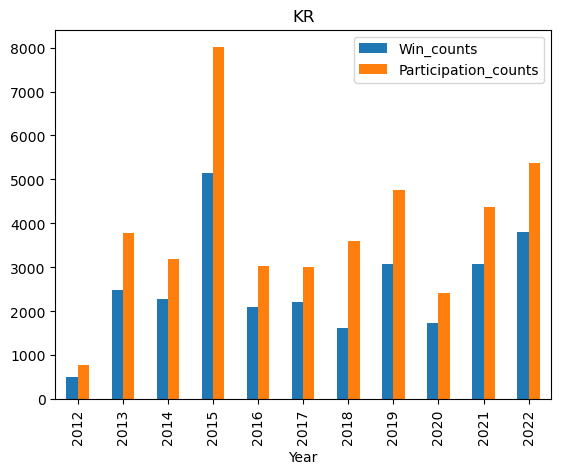

In [488]:
#Graph for participation vs wins
import matplotlib.pyplot as plt

#sample graph for Korea
dfcompare_part_wins_KR = dfcompare_part_wins.loc["KR"]
dfcompare_part_wins_KR.plot(kind="bar", title="KR")

In [489]:
#ratio of participation vs wins
list_regions = list(df_Region_code["Region_code"].unique())
list_regions

#define function for getting wins/participation counts
def get_part_win_ratio(region):
    part_wins_ratio = dfcompare_part_wins.loc[region]["Win_counts"]/dfcompare_part_wins.loc[region]["Participation_counts"]
    return part_wins_ratio.mean()


#make table of region vs ratio
df_ratios = pd.DataFrame()
df_ratios["Regions"]=list_regions
df_ratios["Ratio"] = df_ratios["Regions"].apply(get_part_win_ratio)
    
df_ratios

,Regions,Ratio
0,EMEA,0.430608
1,BR,0.218342
2,CN,0.574447
3,INT,0.345308
4,JP,0.353047
5,KR,0.666444
6,LAT,0.343254
7,NA,0.428368
8,PCS,inf
9,VN,0.231249


In [490]:
#inspect why PCS mean ratio is 'inf'
df_part_wins_ratio_PCS = dfcompare_part_wins.loc["PCS"]["Win_counts"]/dfcompare_part_wins.loc["PCS"]["Participation_counts"]
df_part_wins_ratio_PCS

Year
2011         inf
2012    0.142857
2014    0.428571
2015    0.250000
2016    0.500000
2017    0.319783
2018    0.387597
2019    0.223992
2020    0.438596
2021    0.425353
2022    0.130522
dtype: float64

In [491]:
#remove inf (0/0) from PCS because that's where the inf comes from
import numpy as np
df_part_wins_ratio_PCS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_part_wins_ratio_PCS.dropna(inplace=True)
df_part_wins_ratio_PCS.mean()

#replace PCS mean ratio in table
df_ratios.at[8,"Ratio"] = df_part_wins_ratio_PCS.mean()
df_ratios
#df_ratios.to_csv("Participation_to_Win_Ratio.csv",index=False)

,Regions,Ratio
0,EMEA,0.430608
1,BR,0.218342
2,CN,0.574447
3,INT,0.345308
4,JP,0.353047
5,KR,0.666444
6,LAT,0.343254
7,NA,0.428368
8,PCS,0.324727
9,VN,0.231249


In [ ]:
#can see that KR and CN has participation to win ratio > 50%
#also they have most wins in Worlds
#will also look at EMEA and NA

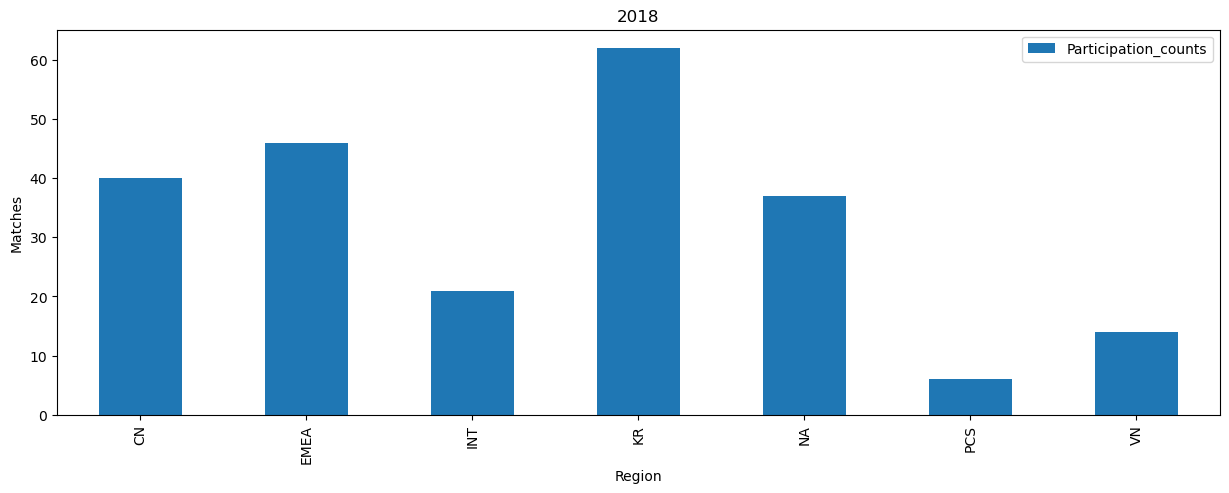

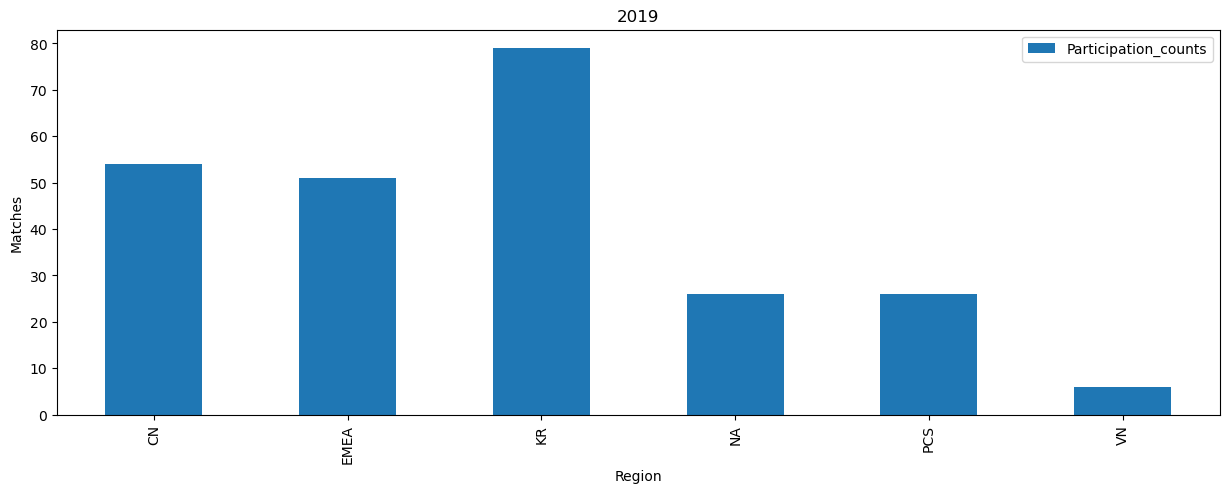

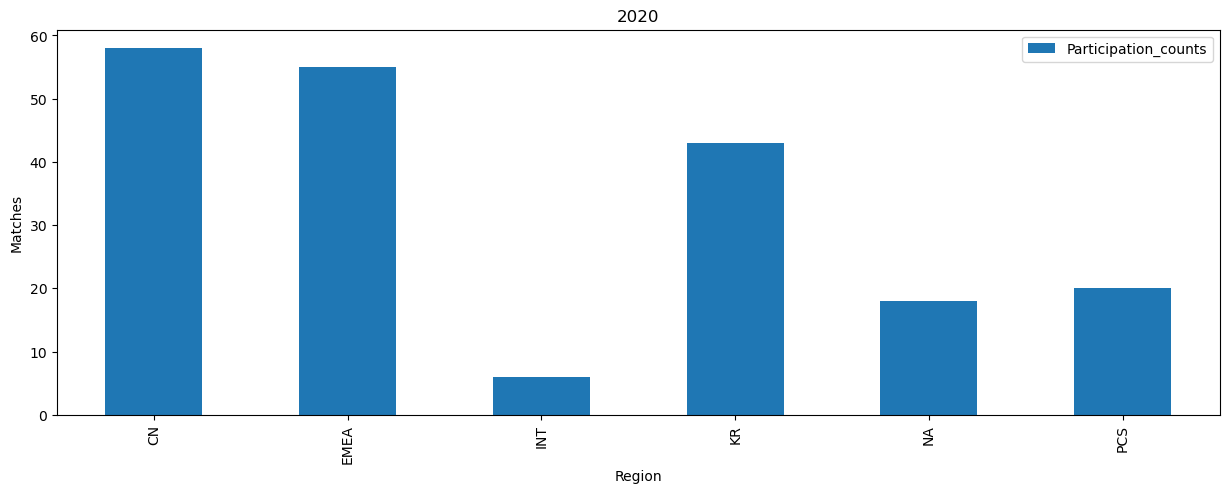

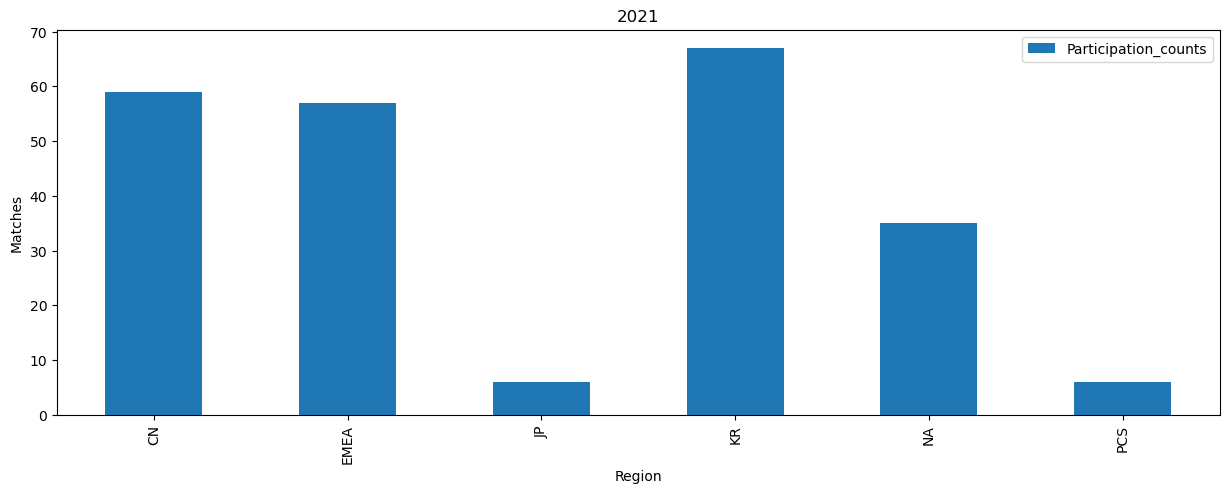

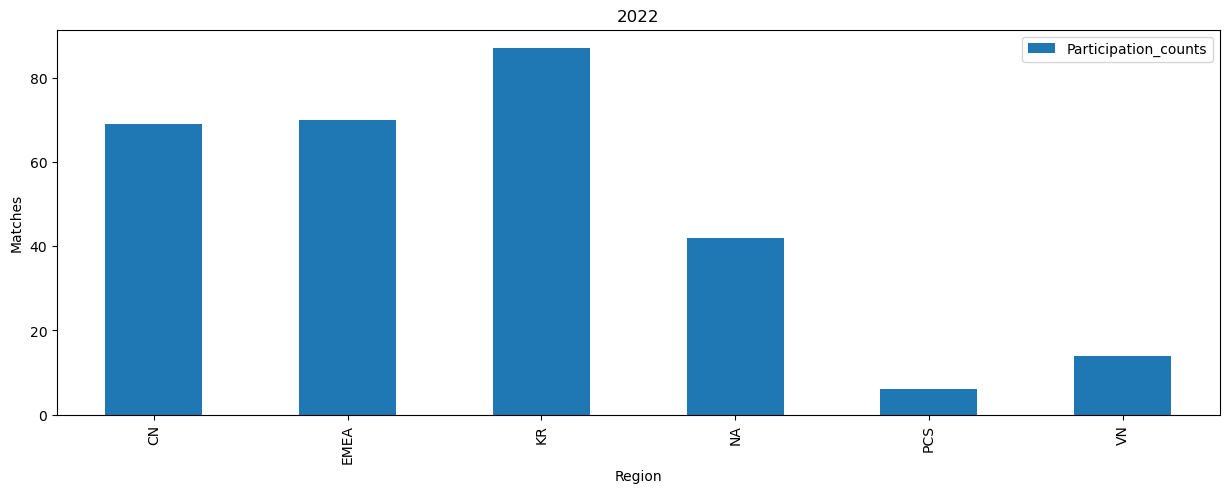

In [562]:
#get finals only
df_team1and2_finals = df_team1and2_winner_code2[df_team1and2_winner_code2["Stage"]=="Finals"]
df_team1and2_finals.head()

##compare participation vs wins

#concatenate teams 1 and 2 for full partcipation
data1 = df_team1and2_finals.groupby(["Year","Region_code_T1"])["Region_code_T1"].count()
data2 = df_team1and2_finals.groupby(["Year","Region_code_T2"])["Region_code_T2"].count()
data_finals = pd.concat([data1,data2],axis=1)
df_participation_finals = pd.DataFrame(data_finals)
df_participation_finals["Region_T1_T2"]=df_participation_finals["Region_code_T1"] + df_participation_finals["Region_code_T2"] 
df_participation_finals= df_participation_finals.reset_index()
df_participation_finals.rename(columns={df_participation_finals.columns[1]:"Region_Participation",df_participation_finals.columns[4]:"Participation_counts"},inplace=True)

#groupby years and regions
participation_finals_data = df_participation_finals.groupby(["Year","Region_Participation"])["Participation_counts"].sum()

#group regions and count wins per region
wins_finals = df_team1and2_finals.groupby(["Year","Region_code_Win"])["Region_code_Win"].count()

#table for counting wins per region
dfwins_finals = pd.DataFrame(wins_finals)
dfwins_finals.rename(columns={"Region_code_Win":"Win_counts"},inplace=True)
dfwins_finals = dfwins_finals.reset_index()
dfwins_finals.rename(columns={"Region_code_Win":"Region_code"},inplace=True)
dfwins_finals.head()

#table for counting participation per region
dfparticipation_finals = pd.DataFrame(participation_finals_data)
dfparticipation_finals = dfparticipation_finals.reset_index()
dfparticipation_finals.rename(columns={"Region_Participation":"Region_code"},inplace=True)
dfparticipation_finals = dfparticipation_finals.set_index(["Year","Region_code"])



#plot Recent 5Y regional matches in Worlds Finals 
import matplotlib.pyplot as plt

for i in range(2018,2023):
    dfparticipation_finals.loc[i].plot(kind = "bar",title = i, figsize=(15,5), xlabel="Region",ylabel="Matches")
    

In [591]:
#dfparticipation_finals_by_region = dfparticipation_finals.reset_index()
#dfparticipation_finals_by_region = dfparticipation_finals_by_region.set_index(["Region_code","Year"])
#dfparticipation_finals_by_region

#dfparticipation_finals = dfparticipation_finals.reset_index()
piv_participation_finals = pd.pivot_table(dfparticipation_finals,index="Region_code",columns="Year",values="Participation_counts", fill_value=0)
piv_participation_finals

#can see that KR, CN and EMEA has similar number of teams playing in finals *knockout stage* matches

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region_code,,,,,,,,,,,,
BR,0,0,0,6,14,6,0,0,0,0,0,0
CN,0,20,27,166,21,27,36,40,54,58,59,69
EMEA,52,20,63,32,43,25,48,46,51,55,57,70
INT,0,54,42,14,18,16,6,21,0,6,0,0
JP,0,0,0,0,0,0,0,0,0,0,6,0
KR,0,41,79,56,143,53,52,62,79,43,67,87
NA,78,24,35,35,27,21,33,37,26,18,35,42
PCS,0,7,16,7,16,6,6,6,26,20,6,6
VN,0,0,0,0,0,0,35,14,6,0,0,14


## Decide to only look at KR, CN, EMEA as a result of analysis:
- Worlds Winners region frequency
- Match winners region frequency
- Entering finals (knockout stage) region frequency

## API LCK Info

In [493]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['LCK']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
    
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League")
    
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

  0%|          | 0/1 [00:00<?, ?it/s]

In [494]:
import pandas as pd

df_Scoreboard_LCK = pd.DataFrame([ a['title'] for a in results ])

df_Scoreboard_LCK = df_Scoreboard_LCK.drop("Date__precision", axis=1)

df_Scoreboard_LCK.sort_values(by = "Date",inplace=True)

df_Scoreboard_LCK["Date"] = pd.to_datetime(df_Scoreboard_LCK["Date"])
df_Scoreboard_LCK["Year"]= df_Scoreboard_LCK["Date"].dt.year

df_Scoreboard_LCK = df_Scoreboard_LCK.astype({'Team1Score':'int','Team2Score':'int'})

df_Scoreboard_LCK = df_Scoreboard_LCK.reset_index(drop=True)

df_Scoreboard_LCK.head()

#save as csv
#df_Scoreboard_LCK.to_csv("Scoreboard_LCK.csv", index=False)

,Tournament,League,Date,Gamelength,Team1,Team2,Team1Score,Team2Score,WinTeam,Year
0,LCK 2016 Spring Promotion,LCK,2015-09-11 08:58:00,29:04,Incredible Miracle,Dark Wolves,1,0,Incredible Miracle,2015
1,LCK 2016 Spring Promotion,LCK,2015-09-11 09:44:00,33:50,Dark Wolves,Incredible Miracle,1,1,Dark Wolves,2015
2,LCK 2016 Spring Promotion,LCK,2015-09-11 10:34:00,36:57,Incredible Miracle,Dark Wolves,2,1,Incredible Miracle,2015
3,LCK 2016 Spring Promotion,LCK,2015-09-11 11:28:00,25:52,Dark Wolves,Incredible Miracle,1,3,Incredible Miracle,2015
4,LCK 2016 Spring Promotion,LCK,2015-09-12 08:45:00,45:31,SBENU Sonicboom,ESC Ever,1,0,SBENU Sonicboom,2015


In [600]:
#get if blue side or red side is winner
for lab, row in df_Scoreboard_LCK.iterrows():
    if row["Team1"] == row["WinTeam"]:
        df_Scoreboard_LCK.loc[lab,"Blue/Red"] = "Blue"
    else:
        df_Scoreboard_LCK.loc[lab,"Blue/Red"] = "Red"
    
df_Scoreboard_LCK.head()

#table form
df_Scoreboard_LCK.groupby(["Blue/Red"])["Blue/Red"].count()

Blue/Red
Blue    1964
Red     1691
Name: Blue/Red, dtype: int64